## PROYECTO FINAL - DATA ANALYSIS - INFONAVIT

Wiliam Hernández - Johanna Cruz - Stephanie Haidenberg

##### Fuente de Datos
Los datos fueron obtenidos de la siguiente liga: https://portalmx.infonavit.org.mx/wps/portal/infonavit.web

##### Carga de Datos
A continuación se muestra cómo cargar los datos en Python desde un archivo CSV. Para cargar los datos usaremos Pandas

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

##### Desde un archivo CSV

In [4]:
df = pd.read_csv('../../Prototype/datos/R_otor_credito_numero_creditos_formalizados.csv')

##### Análisis Exploratorio de Datos (EDA)
Utilizamos el método "describe" para tener información estadística y "head" para obtener las primeras líneas del DataFrame. 

In [5]:
df.describe()

,valor,anio
count,9646.000000,9646.000000
mean,3562.520319,2015.924528
std,6909.756103,2.546673
min,0.000000,2012.000000
25%,338.250000,2014.000000
50%,1004.500000,2016.000000
75%,3169.750000,2018.000000
max,69661.000000,2020.000000


In [6]:
df.head(3)

,tipo,Nombre_de_la_Serie,valor,categoria,anio,tipo2
0,66_anios_o_mas,2012/01,28,edad,2012,66_anios_o_mas
1,66_anios_o_mas,2012/02,19,edad,2012,66_anios_o_mas
2,66_anios_o_mas,2012/03,23,edad,2012,66_anios_o_mas


In [7]:
df["tipo"] == 'Total_nacional'

0       False
1       False
2       False
3       False
4       False
        ...  
9641    False
9642    False
9643    False
9644    False
9645    False
Name: tipo, Length: 9646, dtype: bool

##### Realizamos filtros por edad

In [8]:
df_filter = df["categoria"] == "edad"

In [9]:
df_edad = df[df_filter]
df_edad

,tipo,Nombre_de_la_Serie,valor,categoria,anio,tipo2
0,66_anios_o_mas,2012/01,28,edad,2012,66_anios_o_mas
1,66_anios_o_mas,2012/02,19,edad,2012,66_anios_o_mas
2,66_anios_o_mas,2012/03,23,edad,2012,66_anios_o_mas
3,66_anios_o_mas,2012/04,13,edad,2012,66_anios_o_mas
4,66_anios_o_mas,2012/05,16,edad,2012,66_anios_o_mas
...,...,...,...,...,...,...
7415,Otros_anios,2020/06,407,edad,2020,Otros_anios
7416,Otros_anios,2020/07,385,edad,2020,Otros_anios
7417,Otros_anios,2020/08,397,edad,2020,Otros_anios
7418,Otros_anios,2020/09,409,edad,2020,Otros_anios


In [10]:
counts = df_edad.groupby(['tipo']).sum()
counts

,valor,anio
tipo,,
66_anios_o_mas,534,213688
De_21_a_25_anios,715560,213688
De_26_a_30_anios,1078610,213688
De_31_a_35_anios,944172,213688
De_36_a_40_anios,771718,213688
De_41_a_45_anios,584143,213688
De_46_a_50_anios,399138,213688
De_51_a_55_anios,227941,213688
De_56_a_60_anios,100162,213688


In [11]:
df_edad['valor']

0        28
1        19
2        23
3        13
4        16
       ... 
7415    407
7416    385
7417    397
7418    409
7419    313
Name: valor, Length: 1272, dtype: int64

In [12]:
df_edad['tipo']

0       66_anios_o_mas
1       66_anios_o_mas
2       66_anios_o_mas
3       66_anios_o_mas
4       66_anios_o_mas
             ...      
7415       Otros_anios
7416       Otros_anios
7417       Otros_anios
7418       Otros_anios
7419       Otros_anios
Name: tipo, Length: 1272, dtype: object

# Colocación de créditos por edad del acreditado

##### La edad más relevante para el Infonavit en cuanto a colocación de créditos, es el grupo de edad entre 26 a 30 años, representando el 19% del total de créditos. Seguido por 31 a 35 y 36 a 40 años con el 17% cada uno.

In [23]:
counts = df_edad['valor'].groupby(df_edad['tipo']).sum()
counts

tipo
66_anios_o_mas          534
De_21_a_25_anios     715560
De_26_a_30_anios    1078610
De_31_a_35_anios     944172
De_36_a_40_anios     771718
De_41_a_45_anios     584143
De_46_a_50_anios     399138
De_51_a_55_anios     227941
De_56_a_60_anios     100162
De_61_a_65_anios      12272
Hasta_20_anios        39314
Otros_anios           35589
Name: valor, dtype: int64

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [37]:
counts = counts.sort_values(ascending = False)

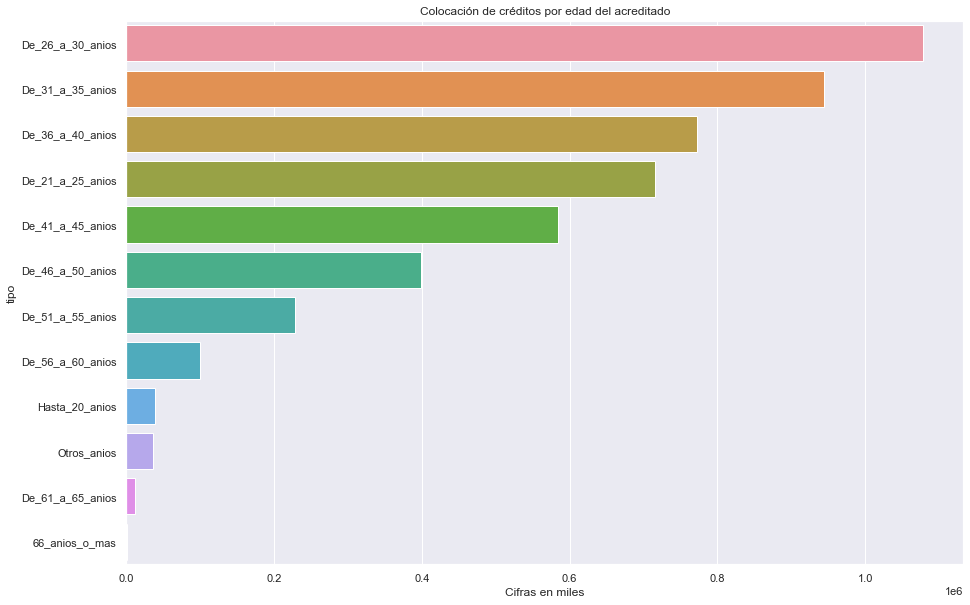

In [38]:
ax = sns.barplot(y = counts.index, x = counts, orient = 'h')
ax.set_title('Colocación de créditos por edad del acreditado')
ax.set(xlabel='Cifras en miles');

# Cantidad de créditos colocados por estado

##### El estado donde más créditos son colocados es Nuevo León, seguido por Jalisco y México.

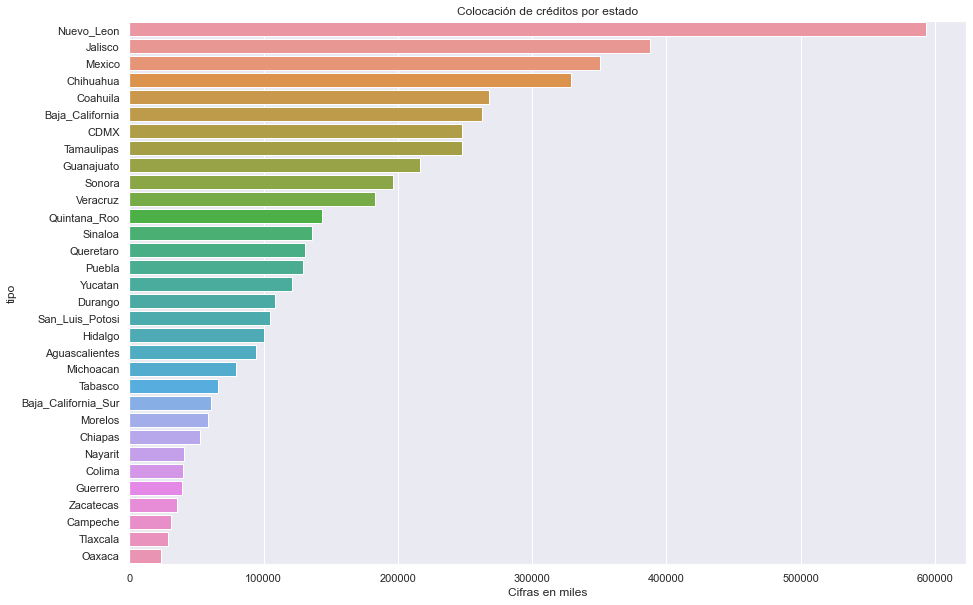

In [39]:
df_filter = df["categoria"] == "estado"
df_analisis = df[df_filter]
counts = df_analisis['valor'].groupby(df_analisis['tipo']).sum()
counts = counts.sort_values(ascending = False)
ax = sns.barplot(y = counts.index, x = counts, orient = 'h')
ax.set_title('Colocación de créditos por estado')
ax.set(xlabel='Cifras en miles');

# Colocación de créditos por rango salarial

##### Los niveles socioeconómicos bajos son los más representativos.

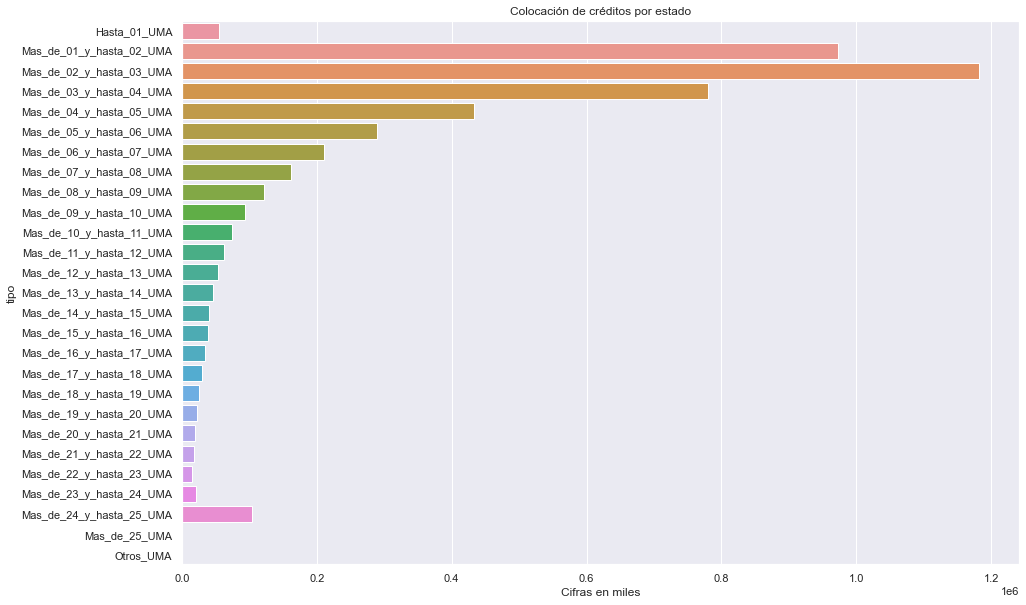

In [15]:
df_filter = df["categoria"] == "Salario_UMA"
df_analisis = df[df_filter]
counts = df_analisis['valor'].groupby(df_analisis['tipo']).sum()
ax = sns.barplot(y = counts.index, x = counts, orient = 'h')
ax.set_title('Colocación de créditos por estado')
ax.set(xlabel='Cifras en miles');

# Cantidad de créditos colocados clasificados por el tipo de vivienda

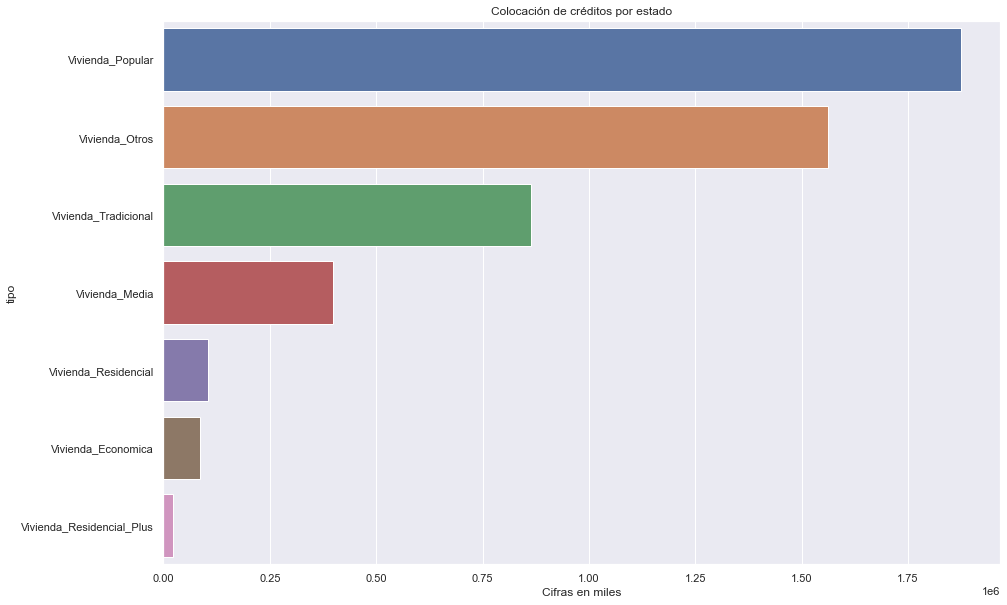

In [40]:
df_filter = df["categoria"] == "Tipo_Vivienda"
df_analisis = df[df_filter]
counts = df_analisis['valor'].groupby(df_analisis['tipo']).sum()
counts = counts.sort_values(ascending = False)
ax = sns.barplot(y = counts.index, x = counts, orient = 'h')
ax.set_title('Colocación de créditos por estado')
ax.set(xlabel='Cifras en miles');

# Colocación de créditos por la clasificación del tipo de crédito

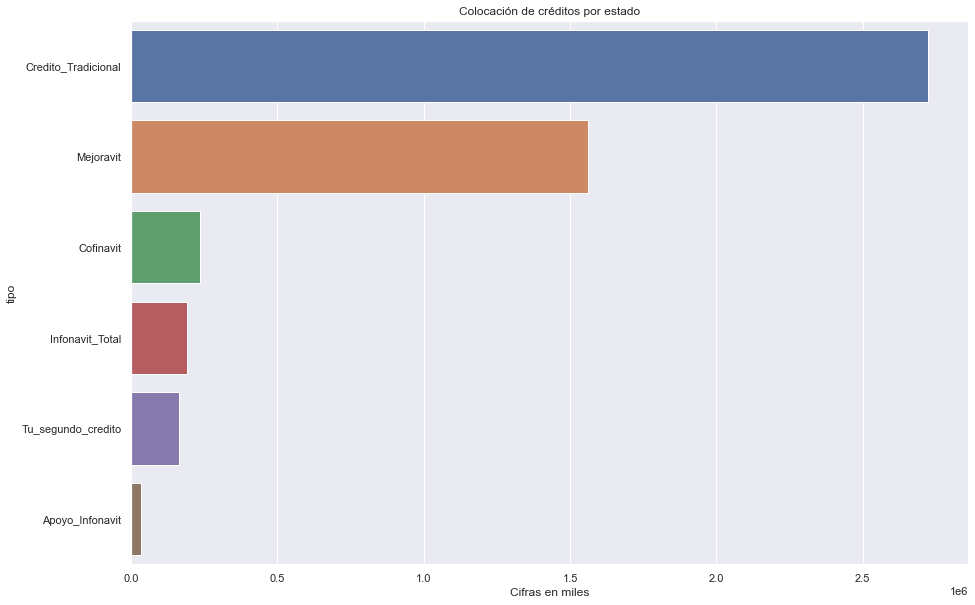

In [41]:
df_filter1 = df["categoria"] == "Tipo_Credito"
df_filter2 = df["tipo"] != "Infonavit_tu_propia_obra"
df_analisis = df[df_filter1 & df_filter2]
counts = df_analisis['valor'].groupby(df_analisis['tipo']).sum()
counts = counts.sort_values(ascending = False)
ax = sns.barplot(y = counts.index, x = counts, orient = 'h')
ax.set_title('Colocación de créditos por estado')
ax.set(xlabel='Cifras en miles');

# Tendencia de colocación de créditos mensual

##### A principio de año, menos créditos son colocados. Se pueden visualizar caídas anuales en los primeros 3 meses del año. Este año 2020 fue atípico, teniendo caídas también en el segundo trimestre.

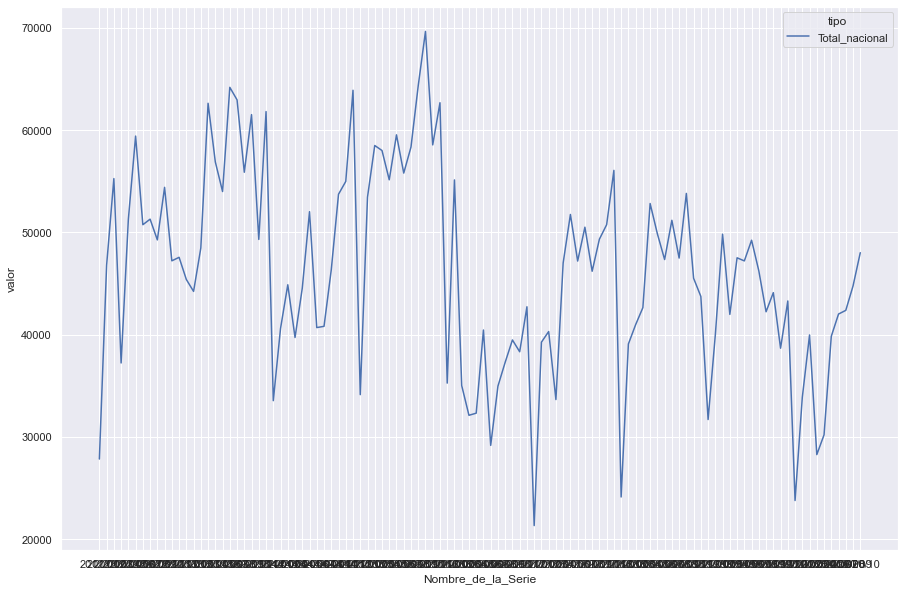

In [18]:

import seaborn as sns
sns.set_theme(style="darkgrid")

df_tendencia = df[df["categoria"] == "Total_nacional"]
df_tendencia

# Grafica para los diferentes tipos de credito
sns.lineplot(x="Nombre_de_la_Serie", y="valor",
             hue="tipo",
             data=df_tendencia)

In [20]:
#df_tendencia.drop(['tipo2', 'anio'], axis='columns', inplace=True)
df_tendencia = df_tendencia.drop(['tipo2', 'anio'], axis=1)
df_tendencia

,tipo,Nombre_de_la_Serie,valor,categoria
8374,Total_nacional,2012/01,27835,Total_nacional
8375,Total_nacional,2012/02,46796,Total_nacional
8376,Total_nacional,2012/03,55264,Total_nacional
8377,Total_nacional,2012/04,37231,Total_nacional
8378,Total_nacional,2012/05,51287,Total_nacional
...,...,...,...,...
8475,Total_nacional,2020/06,39842,Total_nacional
8476,Total_nacional,2020/07,42018,Total_nacional
8477,Total_nacional,2020/08,42377,Total_nacional
8478,Total_nacional,2020/09,44762,Total_nacional


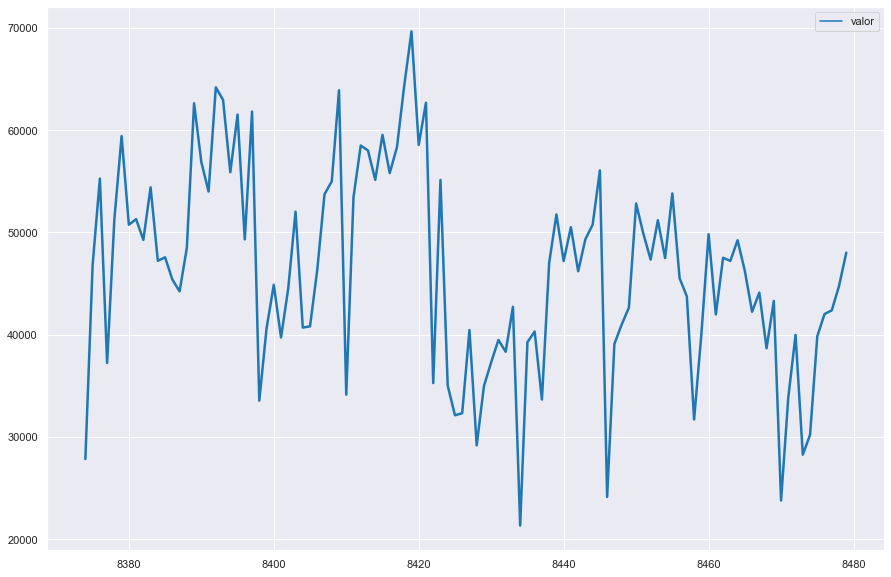

In [21]:
sns.lineplot(data=df_tendencia, palette="tab10", linewidth=2.5)

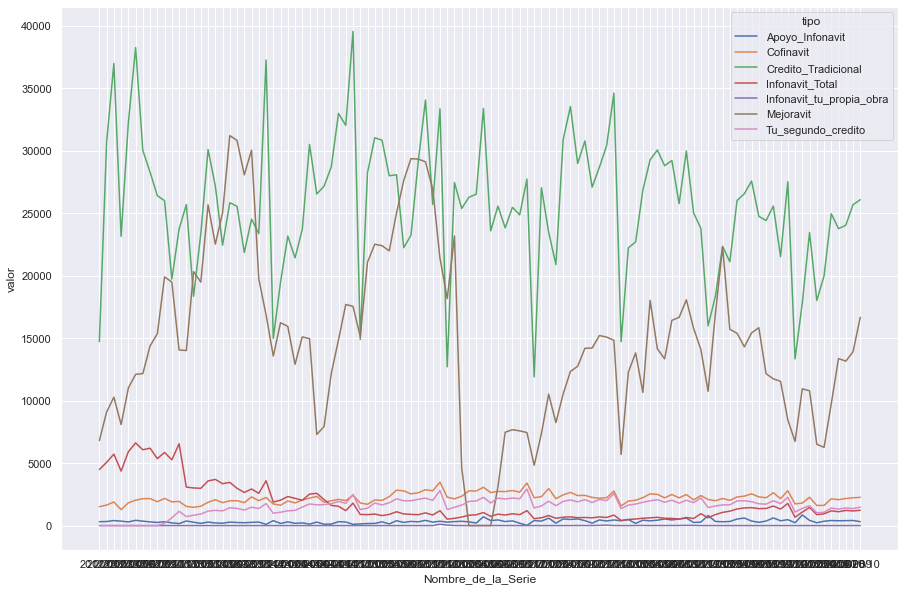

In [22]:

sns.set_theme(style="darkgrid")

df_tendencia = df[df["categoria"] == "Tipo_Credito"]

# Grafica para los diferentes tipos de credito
sns.lineplot(x="Nombre_de_la_Serie", y="valor",
             hue="tipo",
             data=df_tendencia)

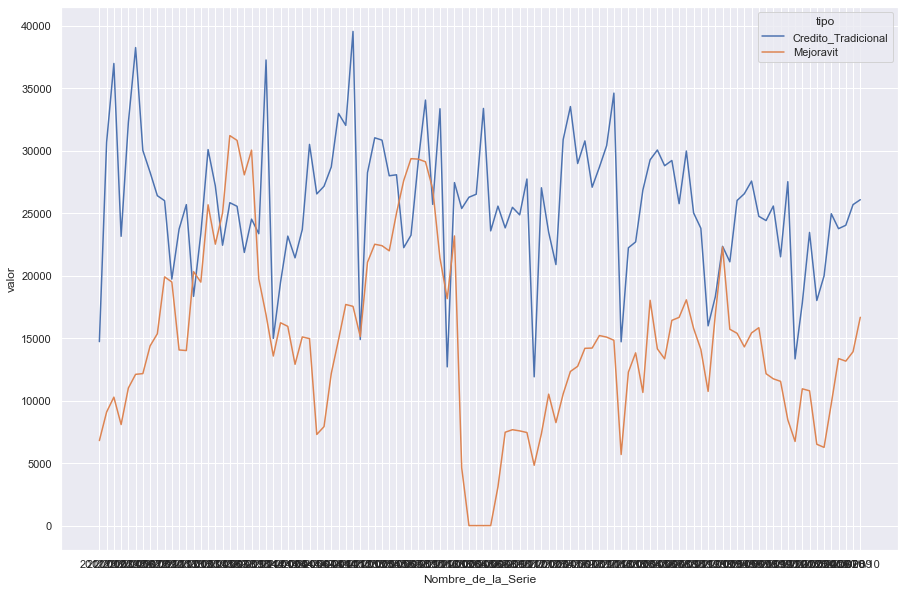

In [23]:
df_tendencia = df[df["tipo"].isin(["Credito_Tradicional", "Mejoravit"])]
df_tendencia
# Grafica para los tipo de credito infonavit y Mejoravit
sns.lineplot(x="Nombre_de_la_Serie", y="valor",
             hue="tipo",
             data=df_tendencia)
 #df[df[f'POOL_{x}'].isin(lista)]

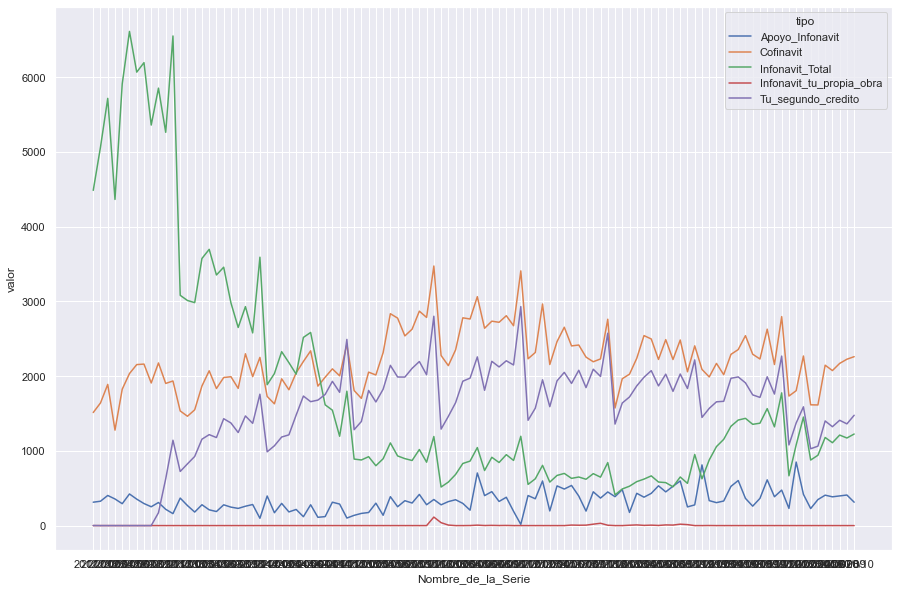

In [24]:
filtro1 = df["tipo"].isin(["Credito_Tradicional", "Mejoravit"])
filtro2 = df["categoria"] == 'Tipo_Credito'
df_tendencia = df[~filtro1 & filtro2]
df_tendencia
# Grafica para los tipo de credito infonavit y Mejoravit
sns.lineplot(x="Nombre_de_la_Serie", y="valor",
             hue="tipo",
             data=df_tendencia)
 #df[df[f'POOL_{x}'].isin(lista)]

In [25]:
df_tendencia = df[df["categoria"] == "Tipo_Credito"]
df_tendencia

,tipo,Nombre_de_la_Serie,valor,categoria,anio,tipo2
212,Apoyo_Infonavit,2012/01,313,Tipo_Credito,2012,NaN
213,Apoyo_Infonavit,2012/02,326,Tipo_Credito,2012,NaN
214,Apoyo_Infonavit,2012/03,403,Tipo_Credito,2012,NaN
215,Apoyo_Infonavit,2012/04,356,Tipo_Credito,2012,NaN
216,Apoyo_Infonavit,2012/05,293,Tipo_Credito,2012,NaN
...,...,...,...,...,...,...
8581,Tu_segundo_credito,2020/06,1400,Tipo_Credito,2020,NaN
8582,Tu_segundo_credito,2020/07,1323,Tipo_Credito,2020,NaN
8583,Tu_segundo_credito,2020/08,1409,Tipo_Credito,2020,NaN
8584,Tu_segundo_credito,2020/09,1361,Tipo_Credito,2020,NaN


In [26]:
df_tendencia = df[df["categoria"] == "Tipo_Credito"]
df_tendencia = df_tendencia.set_index(['Nombre_de_la_Serie','tipo']).unstack('tipo').fillna(0).reset_index()
df_tendencia

Nombre_de_la_Serie           valor                                \
tipo                    Apoyo_Infonavit Cofinavit Credito_Tradicional   
0               2012/01             313      1513               14720   
1               2012/02             326      1641               30677   
2               2012/03             403      1889               36978   
3               2012/04             356      1277               23149   
4               2012/05             293      1825               32253   
..                  ...             ...       ...                 ...   
101             2020/06             407      2146               24955   
102             2020/07             385      2074               23760   
103             2020/08             397      2170               24031   
104             2020/09             409      2226               25683   
105             2020/10             313      2260               26076   

                                                                            \
tipo Infonavit_Total Infonavit_tu_propia_obra Mejoravit Tu_segundo_credito   
0               4485                        0      6803                  1   
1               5064                        0      9088                  0   
2               5716                        0     10278                  0   
3               4364                        0      8085                  0   
4               5910                        0     11006                  0   
..               ...                      ...       ...                ...   
101             1179                        0      9755               1400   
102             1109                        0     13367               1323   
103             1211                        0     13159               1409   
104             1172                        0     13911               1361   
105             1225                        0     16667               1476   

           categoria                ...                     anio            \
tipo Apoyo_Infonavit     Cofinavit  ... Infonavit_tu_propia_obra Mejoravit   
0       Tipo_Credito  Tipo_Credito  ...                     2012      2012   
1       Tipo_Credito  Tipo_Credito  ...                     2012      2012   
2       Tipo_Credito  Tipo_Credito  ...                     2012      2012   
3       Tipo_Credito  Tipo_Credito  ...                     2012      2012   
4       Tipo_Credito  Tipo_Credito  ...                     2012      2012   
..               ...           ...  ...                      ...       ...   
101     Tipo_Credito  Tipo_Credito  ...                     2020      2020   
102     Tipo_Credito  Tipo_Credito  ...                     2020      2020   
103     Tipo_Credito  Tipo_Credito  ...                     2020      2020   
104     Tipo_Credito  Tipo_Credito  ...                     2020      2020   
105     Tipo_Credito  Tipo_Credito  ...                     2020      2020   

                                  tipo2                                \
tipo Tu_segundo_credito Apoyo_Infonavit Cofinavit Credito_Tradicional   
0                  2012               0         0                   0   
1                  2012               0         0                   0   
2                  2012               0         0                   0   
3                  2012               0         0                   0   
4                  2012               0         0                   0   
..                  ...             ...       ...                 ...   
101                2020               0         0                   0   
102                2020               0         0                   0   
103                2020               0         0                   0   
104                2020               0         0                   0   
105                2020               0         0                   0   

                                                                           

In [27]:
df_tendencia = df[df["categoria"] == "Tipo_Credito"]
#df_tendencia=pd.melt(df_tendencia,id_vars='Nombre_de_la_Serie',var_name='tipo',value_name='valor')
df_tendencia

,tipo,Nombre_de_la_Serie,valor,categoria,anio,tipo2
212,Apoyo_Infonavit,2012/01,313,Tipo_Credito,2012,NaN
213,Apoyo_Infonavit,2012/02,326,Tipo_Credito,2012,NaN
214,Apoyo_Infonavit,2012/03,403,Tipo_Credito,2012,NaN
215,Apoyo_Infonavit,2012/04,356,Tipo_Credito,2012,NaN
216,Apoyo_Infonavit,2012/05,293,Tipo_Credito,2012,NaN
...,...,...,...,...,...,...
8581,Tu_segundo_credito,2020/06,1400,Tipo_Credito,2020,NaN
8582,Tu_segundo_credito,2020/07,1323,Tipo_Credito,2020,NaN
8583,Tu_segundo_credito,2020/08,1409,Tipo_Credito,2020,NaN
8584,Tu_segundo_credito,2020/09,1361,Tipo_Credito,2020,NaN


In [28]:
df_tendencia.columns

Index(['tipo', 'Nombre_de_la_Serie', 'valor', 'categoria', 'anio', 'tipo2'], dtype='object')

In [29]:
df_tendencia = df[df["categoria"] == "Tipo_Credito"]
df_tendencia = df_tendencia.pivot_table(index=df_tendencia['Nombre_de_la_Serie'], columns=[df_tendencia['tipo']])


df_tendencia=df_tendencia.reset_index()
df_tendencia

Nombre_de_la_Serie            anio                                \
tipo                    Apoyo_Infonavit Cofinavit Credito_Tradicional   
0               2012/01            2012      2012                2012   
1               2012/02            2012      2012                2012   
2               2012/03            2012      2012                2012   
3               2012/04            2012      2012                2012   
4               2012/05            2012      2012                2012   
..                  ...             ...       ...                 ...   
101             2020/06            2020      2020                2020   
102             2020/07            2020      2020                2020   
103             2020/08            2020      2020                2020   
104             2020/09            2020      2020                2020   
105             2020/10            2020      2020                2020   

                                                                            \
tipo Infonavit_Total Infonavit_tu_propia_obra Mejoravit Tu_segundo_credito   
0               2012                     2012      2012               2012   
1               2012                     2012      2012               2012   
2               2012                     2012      2012               2012   
3               2012                     2012      2012               2012   
4               2012                     2012      2012               2012   
..               ...                      ...       ...                ...   
101             2020                     2020      2020               2020   
102             2020                     2020      2020               2020   
103             2020                     2020      2020               2020   
104             2020                     2020      2020               2020   
105             2020                     2020      2020               2020   

               valor                                                \
tipo Apoyo_Infonavit Cofinavit Credito_Tradicional Infonavit_Total   
0                313      1513               14720            4485   
1                326      1641               30677            5064   
2                403      1889               36978            5716   
3                356      1277               23149            4364   
4                293      1825               32253            5910   
..               ...       ...                 ...             ...   
101              407      2146               24955            1179   
102              385      2074               23760            1109   
103              397      2170               24031            1211   
104              409      2226               25683            1172   
105              313      2260               26076            1225   

                                                            
tipo Infonavit_tu_propia_obra Mejoravit Tu_segundo_credito  
0                           0      6803                  1  
1                           0      9088                  0  
2                           0     10278                  0  
3                           0      8085                  0  
4                           0     11006                  0  
..                        ...       ...                ...  
101                         0      9755               1400  
102                         0     13367               1323  
103                         0     13159               1409  
104                         0     13911               1361  
105                         0     16667               1476  

[106 rows x 15 columns]

In [30]:
df_tendencia = df_tendencia.reset_index(drop = True)
df_tendencia

Nombre_de_la_Serie            anio                                \
tipo                    Apoyo_Infonavit Cofinavit Credito_Tradicional   
0               2012/01            2012      2012                2012   
1               2012/02            2012      2012                2012   
2               2012/03            2012      2012                2012   
3               2012/04            2012      2012                2012   
4               2012/05            2012      2012                2012   
..                  ...             ...       ...                 ...   
101             2020/06            2020      2020                2020   
102             2020/07            2020      2020                2020   
103             2020/08            2020      2020                2020   
104             2020/09            2020      2020                2020   
105             2020/10            2020      2020                2020   

                                                                            \
tipo Infonavit_Total Infonavit_tu_propia_obra Mejoravit Tu_segundo_credito   
0               2012                     2012      2012               2012   
1               2012                     2012      2012               2012   
2               2012                     2012      2012               2012   
3               2012                     2012      2012               2012   
4               2012                     2012      2012               2012   
..               ...                      ...       ...                ...   
101             2020                     2020      2020               2020   
102             2020                     2020      2020               2020   
103             2020                     2020      2020               2020   
104             2020                     2020      2020               2020   
105             2020                     2020      2020               2020   

               valor                                                \
tipo Apoyo_Infonavit Cofinavit Credito_Tradicional Infonavit_Total   
0                313      1513               14720            4485   
1                326      1641               30677            5064   
2                403      1889               36978            5716   
3                356      1277               23149            4364   
4                293      1825               32253            5910   
..               ...       ...                 ...             ...   
101              407      2146               24955            1179   
102              385      2074               23760            1109   
103              397      2170               24031            1211   
104              409      2226               25683            1172   
105              313      2260               26076            1225   

                                                            
tipo Infonavit_tu_propia_obra Mejoravit Tu_segundo_credito  
0                           0      6803                  1  
1                           0      9088                  0  
2                           0     10278                  0  
3                           0      8085                  0  
4                           0     11006                  0  
..                        ...       ...                ...  
101                         0      9755               1400  
102                         0     13367               1323  
103                         0     13159               1409  
104                         0     13911               1361  
105                         0     16667               1476  

[106 rows x 15 columns]

In [31]:
df_tendencia.columns

MultiIndex([('Nombre_de_la_Serie',                         ''),
            (              'anio',          'Apoyo_Infonavit'),
            (              'anio',                'Cofinavit'),
            (              'anio',      'Credito_Tradicional'),
            (              'anio',          'Infonavit_Total'),
            (              'anio', 'Infonavit_tu_propia_obra'),
            (              'anio',                'Mejoravit'),
            (              'anio',       'Tu_segundo_credito'),
            (             'valor',          'Apoyo_Infonavit'),
            (             'valor',                'Cofinavit'),
            (             'valor',      'Credito_Tradicional'),
            (             'valor',          'Infonavit_Total'),
            (             'valor', 'Infonavit_tu_propia_obra'),
            (             'valor',                'Mejoravit'),
            (             'valor',       'Tu_segundo_credito')],
           names=[None, 'tipo'])

In [32]:
col_1 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Credito_Tradicional")][['Nombre_de_la_Serie', 'valor']].rename(columns={'valor':'Credito_Tradicional'}).reset_index(drop=True)
col_2 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Apoyo_Infonavit")][['valor']].rename(columns={'valor':'Apoyo_Infonavit'}).reset_index(drop=True)
col_3 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Cofinavit")][['valor']].rename(columns={'valor':'Cofinavit'}).reset_index(drop=True)
col_4 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Infonavit_Total")][['valor']].rename(columns={'valor':'Infonavit_Total'}).reset_index(drop=True)
col_5 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Mejoravit")][['valor']].rename(columns={'valor':'Mejoravit'}).reset_index(drop=True)
col_6 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Tu_segundo_credito")][['valor']].rename(columns={'valor':'Tu_segundo_credito'}).reset_index(drop=True)

df_tendencia = pd.concat([col_1, col_2, col_3, col_4, col_5, col_6], axis = 1)
df_tendencia


,Nombre_de_la_Serie,Credito_Tradicional,Apoyo_Infonavit,Cofinavit,Infonavit_Total,Mejoravit,Tu_segundo_credito
0,2012/01,14720,313,1513,4485,6803,1
1,2012/02,30677,326,1641,5064,9088,0
2,2012/03,36978,403,1889,5716,10278,0
3,2012/04,23149,356,1277,4364,8085,0
4,2012/05,32253,293,1825,5910,11006,0
...,...,...,...,...,...,...,...
101,2020/06,24955,407,2146,1179,9755,1400
102,2020/07,23760,385,2074,1109,13367,1323
103,2020/08,24031,397,2170,1211,13159,1409
104,2020/09,25683,409,2226,1172,13911,1361


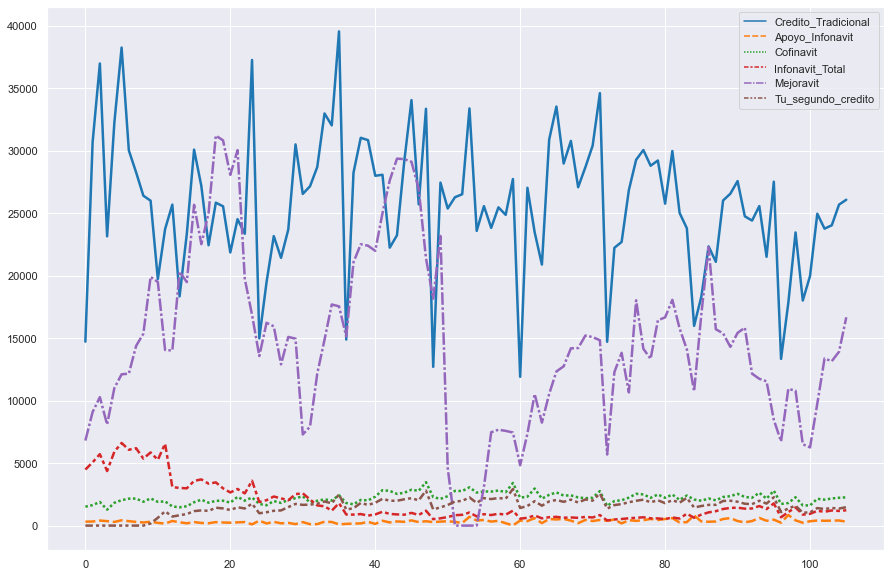

In [33]:
sns.lineplot(data=df_tendencia, palette="tab10", linewidth=2.5)

In [36]:
df

,tipo,Nombre_de_la_Serie,valor,categoria,anio,tipo2
0,66_anios_o_mas,2012/01,28,edad,2012,NaN
1,66_anios_o_mas,2012/02,19,edad,2012,NaN
2,66_anios_o_mas,2012/03,23,edad,2012,NaN
3,66_anios_o_mas,2012/04,13,edad,2012,NaN
4,66_anios_o_mas,2012/05,16,edad,2012,NaN
...,...,...,...,...,...,...
9641,Zacatecas,2020/06,319,estado,2020,centro norte
9642,Zacatecas,2020/07,251,estado,2020,centro norte
9643,Zacatecas,2020/08,263,estado,2020,centro norte
9644,Zacatecas,2020/09,391,estado,2020,centro norte


# Correlación entre tipos de créditos
##### Hicimos una correlación entre los tipos de crédito pero no se concluyó nada relevante

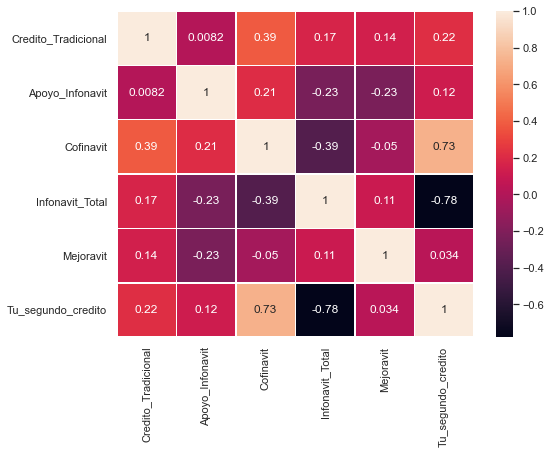

In [34]:
plt.figure(figsize=(8, 6))
col_1 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Credito_Tradicional")][['Nombre_de_la_Serie', 'valor']].rename(columns={'valor':'Credito_Tradicional'}).reset_index(drop=True)
col_2 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Apoyo_Infonavit")][['valor']].rename(columns={'valor':'Apoyo_Infonavit'}).reset_index(drop=True)
col_3 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Cofinavit")][['valor']].rename(columns={'valor':'Cofinavit'}).reset_index(drop=True)
col_4 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Infonavit_Total")][['valor']].rename(columns={'valor':'Infonavit_Total'}).reset_index(drop=True)
col_5 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Mejoravit")][['valor']].rename(columns={'valor':'Mejoravit'}).reset_index(drop=True)
col_6 = df[(df["categoria"] == 'Tipo_Credito') & (df["tipo"] == "Tu_segundo_credito")][['valor']].rename(columns={'valor':'Tu_segundo_credito'}).reset_index(drop=True)

df_tendencia = pd.concat([col_1, col_2, col_3, col_4, col_5, col_6], axis = 1)
df_tendencia

sns.heatmap(df_tendencia.corr(), annot=True, linewidths=.5);

In [35]:
#df_1 = df_edad['valor'].groupby(df_edad['tipo']).sum()
df_1 = df[(df["categoria"] == 'Tipo_Credito')].reset_index(drop = True)
df_1 = df_1['valor'].groupby(df_1['tipo']).sum()
df_1

tipo
Apoyo_Infonavit               35580
Cofinavit                    234563
Credito_Tradicional         2722633
Infonavit_Total              191756
Infonavit_tu_propia_obra        321
Mejoravit                   1561358
Tu_segundo_credito           162942
Name: valor, dtype: int64